In [26]:
import time
start = time.time()
import numpy as np
import pandas as pd

df = pd.read_csv('../stars_train.csv') 
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3484,0.000551,0.0998,16.67,Red,M,0
1,23000,127000.000000,36.0000,-5.76,Blue,O,4
2,4287,630000.000000,1315.0000,-9.20,Orange,K,5
3,3462,0.005300,0.1480,11.47,Red,M,1
4,36108,198000.000000,10.2000,-4.40,Blue,O,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     144 non-null    int64  
 1   L               144 non-null    float64
 2   R               144 non-null    float64
 3   A_M             144 non-null    float64
 4   Color           144 non-null    object 
 5   Spectral_Class  144 non-null    object 
 6   Type            144 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 8.0+ KB


In [28]:
df['Type'].value_counts()

3    27
4    25
5    24
1    24
2    23
0    21
Name: Type, dtype: int64

In [29]:
from sklearn import preprocessing #label encoder

label_encoder = preprocessing.LabelEncoder()
 
df['Color']= label_encoder.fit_transform(df['Color'])
df['Spectral_Class']= label_encoder.fit_transform(df['Spectral_Class'])

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3484,0.000551,0.0998,16.67,5,5,0
1,23000,127000.000000,36.0000,-5.76,0,6,4
2,4287,630000.000000,1315.0000,-9.20,2,4,5
3,3462,0.005300,0.1480,11.47,5,5,1
4,36108,198000.000000,10.2000,-4.40,0,6,3


In [30]:
x_data = df[['Temperature', 'L','R', 'A_M', 'Color', 'Spectral_Class']]

y_data = df['Type']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

print('Training data: ', x_train.shape, y_train.shape)
print('Testing data: ', x_test.shape, y_test.shape)

Training data:  (115, 6) (115,)
Testing data:  (29, 6) (29,)


# Models

**K-nearest neighbors**

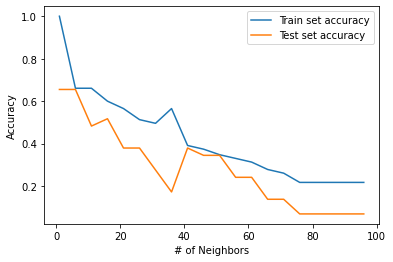

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

#iterating through hyperparameters
for i in range(1, 101, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, knn.predict(x_train)))
    test_acc.append(metrics.accuracy_score(y_test,  knn.predict(x_test)))
    
plt.plot(range(1, 101, 5), train_acc, label='Train set accuracy')
plt.plot(range(1, 101, 5), test_acc, label='Test set accuracy')
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
k_limit = 40
mean_accuracy = np.zeros((k_limit))

for n in range(1, k_limit + 1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    
    mean_accuracy[n-1] = np.mean(metrics.accuracy_score(y_test, y_hat))

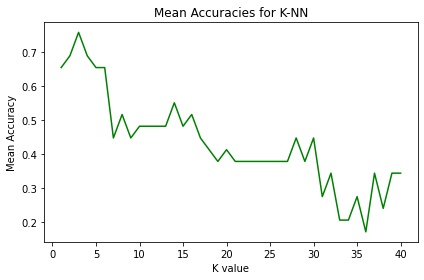

Best accuracy: 0.7586206896551724 with k = 3


In [34]:
plt.plot(np.arange(1, k_limit + 1, 1), mean_accuracy, color='green')
plt.title('Mean Accuracies for K-NN')
plt.xlabel('K value')
plt.ylabel('Mean Accuracy')
plt.tight_layout()
plt.show()

print('Best accuracy:', mean_accuracy.max(), 'with k =', mean_accuracy.argmax() + 1)


**Random Forest Classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

# Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)

knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier()

knn_score = cross_val_score(knn, x_data, y_data, cv=kf)
rf_score = cross_val_score(rf, x_data, y_data, cv=kf)

print("K-Nearest Neighbors:", np.mean(knn_score),"Random Forest:",np.mean(rf_score))

K-Nearest Neighbors: 0.6238095238095238 Random Forest: 0.9928571428571429


# Generating Predictions

In [37]:
stars=pd.read_csv("../stars_competitor_test.csv")
stars.head()

,ID,Temperature,L,R,A_M,Color,Spectral_Class
0,0,3453,0.000621,0.0773,17.08,Red,M
1,1,12098,689.000000,7.0100,0.02,Blue White,A
2,2,2731,0.000437,0.0856,18.09,Red,M
3,3,37800,202900.000000,6.8600,-4.56,Blue,O
4,4,8570,0.000810,0.0097,14.20,Blue White,A


In [38]:
label_encoder = preprocessing.LabelEncoder()

#strings/characters --> integers
stars['Color']= label_encoder.fit_transform(stars['Color'])
stars['Spectral_Class']= label_encoder.fit_transform(stars['Spectral_Class'])

stars.head()

,ID,Temperature,L,R,A_M,Color,Spectral_Class
0,0,3453,0.000621,0.0773,17.08,2,4
1,1,12098,689.000000,7.0100,0.02,1,0
2,2,2731,0.000437,0.0856,18.09,2,4
3,3,37800,202900.000000,6.8600,-4.56,0,5
4,4,8570,0.000810,0.0097,14.20,1,0


In [39]:
features = stars[['Temperature', 'L','R', 'A_M', 'Color', 'Spectral_Class']]

rf.fit(x_train, y_train)

print("Predictions of actual test data:", rf.predict(features))
#len(rf.predict(features))

Predictions of actual test data: [0 3 0 3 2 5 3 4 5 5 4 0 5 4 1 2 1 4 3 1 3 0 2 0 0 1 2 2 2 0 3 1 3 1 2 5 5
 5 0 5 4 3 4 1 2 1 0 5 1 2 3 4 0 0 1 0 1 2 5 4 0 1 3 2 5 1 5 0 2 0 5 3 0 4
 4 0 2 2 2 5 5 1 4 4 2 4 4 4 5 2 3 3 1 1 0 0]


In [40]:
results=pd.DataFrame(rf.predict(features))
results.reset_index(inplace=True)
results = results.rename(columns = {'index':'ID'})

results.to_csv('Li_Helen_Fall21.csv', header=['ID','Predicted'])
end = time.time()
print(end - start)

2.284294366836548
